## Statistics: The Science of Decisions Project Instructions

### Background Information

In a Stroop task, participants are presented with a list of words, with each word displayed in a color of ink. The participant’s task is to say out loud the color of the ink in which the word is printed. The task has two conditions: a congruent words condition, and an incongruent words condition. In the congruent words condition, the words being displayed are color words whose names match the colors in which they are printed: for example RED, BLUE. In the incongruent words condition, the words displayed are color words whose names do not match the colors in which they are printed: for example PURPLE, ORANGE. In each case, we measure the time it takes to name the ink colors in equally-sized lists. Each participant will go through and record a time from each condition.
Questions For Investigation

As a general note, be sure to keep a record of any resources that you use or refer to in the creation of your project. You will need to report your sources as part of the project submission.

### 1. What is our independent variable? What is our dependent variable?

The independent variable is the "words condition" or whether the color spelled out matches the font color of the spelled word. This is defined as congruent when the words being displayed are color words whose names match the colors in which they are printed and incongruent when the words displayed are color words whose names do not match the colors in which they are printed. The dependent variable is the time it takes to name the ink colors in equally-sized lists.


### 2. What is an appropriate set of hypotheses for this task? What kind of statistical test do you expect to perform? Justify your choices.
Now it’s your chance to try out the Stroop task for yourself. Go to this link, which has a Java-based applet for performing the Stroop task. Record the times that you received on the task (you do not need to submit your times to the site.) Now, download this dataset which contains results from a number of participants in the task. Each row of the dataset contains the performance for one participant, with the first number their results on the congruent task and the second number their performance on the incongruent task.

An appropriate null hypothesis is that the word condition has no effect on the time it takes to name the ink colors in equally-sized lists. An appropriate alternative hypothesis is that the time it takes to name the ink colors in equally-sized lists is higher for the incongruent word condition.

I would perform a paired samples one-tailed t-test because each subject performs the exercise twice. Once as a pre test control and then again with the incongruent word condition. I would use a t-test because population standard deviation is unknown.

### 3. Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability.

In [51]:
from ipy_table import *
from statistics import *

congruents = [12.079,16.791,9.564,8.630,14.669,12.238,14.692,8.987,9.401,14.480,22.328,15.298,15.073,16.929,18.200,12.130,18.495,10.639,11.344,12.369,12.944,14.233,19.710,16.004];
incongruents = [19.278,18.741,21.214,15.687,22.803,20.878,24.572,17.394,20.762,26.282,24.524,18.644,17.510,20.330,35.255,22.158,25.139,20.429,17.425,34.288,23.894,17.960,22.058,21.157];
differences = [a - b for a, b in zip(congruents, incongruents)];

stroop_statistics = [
    ['Statistic', 'Congruent', 'Incongruent', 'Difference'],
    ['Mean', '{:.5}'.format(mean(congruents)), '{:.5}'.format(mean(incongruents)), '{:.4}'.format(mean(differences))], 
    ['Median', '{:.5}'.format(median(congruents)), '{:.5}'.format(median(incongruents)), '{:.4}'.format(median(differences))],
    ['Standard Deviation', '{:.4}'.format(stdev(congruents)), '{:.4}'.format(stdev(incongruents)), '{:.4}'.format(stdev(differences))]];
make_table(stroop_statistics)

Statistic,Congruent,Incongruent,Difference
Mean,14.051,22.016,-7.965
Median,14.357,21.017,-7.666
Standard Deviation,3.559,4.797,4.865


### 4. Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.

I decided to create a scatterplot of the differences between the test times. Every difference is negative meaning everyone was slower with the incongruent words condition introduced.

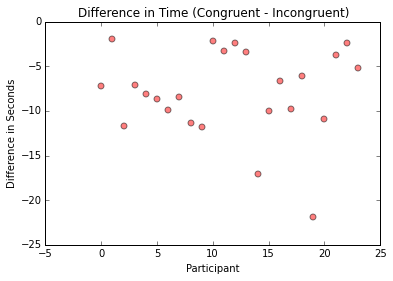

In [31]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

participants = list(range(0,len(differences)));

plt.title("Difference in Time (Congruent - Incongruent)")
plt.xlabel("Participant")
plt.ylabel("Difference in Seconds")
plt.scatter(participants, differences, s=35, c=['red'], alpha=0.5)
plt.show()

### 5. Now, perform the statistical test and report your results. What is your confidence level and your critical statistic value? Do you reject the null hypothesis or fail to reject it? Come to a conclusion in terms of the experiment task. Did the results match up with your expectations?

I would reject the null hypothesis. The incongruent word condition has statistically significant effect on the time it takes to read the word list. These results did match my expectations as it took me almost double the amount of time to read the incongruent word list than the congruent word list.

In [48]:
from math import *
confidence_level = 1.714;
sample_size = len(differences);
mean_of_differences = mean(differences);
standard_deviation_of_differences = stdev(differences);
standard_error = standard_deviation_of_differences / sqrt(sample_size);
t_statistic = mean_of_differences / standard_error;
lower_bound_ci = mean_of_differences - confidence_level * standard_deviation_of_differences;
upper_bound_ci = mean_of_differences + confidence_level * standard_deviation_of_differences;

statistical_test_results = [
    ['Mean of Difference','Standard Deviation of Difference','Sample Size','t statistic','df','Confidence Level (95% One Tail)','Confidence Interval','Reject the Null?'],
    ['{:.4}'.format(mean_of_differences),'{:.4}'.format(standard_deviation_of_differences), sample_size, '{:.4}'.format(t_statistic), sample_size - 1, confidence_level, "(" + '{:.5}'.format(lower_bound_ci) + "," + '{:.3}'.format(upper_bound_ci) + ")", abs(t_statistic) > confidence_level]];
make_table(statistical_test_results)

Mean of Difference,Standard Deviation of Difference,Sample Size,t statistic,df,Confidence Level (95% One Tail),Confidence Interval,Reject the Null?
-7.965,4.865,24,-8.021,23,1.714,"(-16.303,0.374)",True


### 6. Optional: What do you think is responsible for the effects observed? Can you think of an alternative or similar task that would result in a similar effect? Some research about the problem will be helpful for thinking about these two questions!

The physical process of reading is almost subconscious. As the subject looks at the characters on the page, their brain cannot help but start reading the word in their head. They then have to stop this process and focus on the background color and ignore the meaning of the word. This takes substantial time. The wikipedia article on the Stroop effect calls this theory Automaticity.

Another interesting experiment would be taking varying levels of proficient speakers of English and performing the test with them. I would hypothesize that English beginners would have an easier time responding with the appropriate color (in their own language) because the neural pathways around the semantics of English colors are not as strong as in a native speaker. Therefore the non native beginner would have less cognitive tension to overcome before focusing on the background color.

#### Sources:

[Wikipedia - Student T Test](https://en.wikipedia.org/wiki/Student%27s_t-test#Paired_samples)  
[Wikipedia - Descriptive Statistics](https://en.wikipedia.org/wiki/Descriptive_statistics)  
[SJSU T-Table](http://www.sjsu.edu/faculty/gerstman/StatPrimer/t-table.pdf)  